In [12]:
import pandas as pd
import numpy as np
import datetime as dt

import plotly.graph_objects as go

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

# Объединение данных

### pd.merge()

#### Вопрос из собеседования: как объединятся эти датафреймы?

In [11]:
df1 = pd.DataFrame({'val1': ['A', 'B']}, index=[1,1])
df2 = pd.DataFrame({'val2': ['C', 'B']}, index=[1,1])

display_side_by_side(df1, df2)

,val1
1,A
1,B
,val2
1,C
1,B


In [13]:
df1.join(df2)

,val1,val2
1,A,C
1,A,B
1,B,C
1,B,B


### pd.merge_asof

## Полезные  техники

### Проставить значение по умолчанию для каждой незаполненой записи

In [48]:
df = pd.DataFrame({
    'Name': ['Alex Anderson', 'Rodrick Berton', 'Vera Eros', 'Anna Novikova', 'Edward Shtolz'],
    'Location': ['Block 1', 'Block 1', 'Dock 2', 'Dock 2', 'District 3']
})

add = pd.DataFrame({
    'Name': ['Alex Anderson', 'Rodrick Berton', 'Vera Eros', 'Anna Novikova', 'Edward Shtolz', 
             'Alex Anderson', 'Rodrick Berton', 'Vera Eros', 'Anna Novikova', 'Edward Shtolz'], # default-значения
    'Location': ['Block 1', 'Block 1', 'Dock 3', 'Dock 2', 'Block 1',
                 'Default', 'Default', 'Default', 'Default', 'Default'], # default-значения
    'Value': [18, 23, 37, 12, 28, 
              20, 20, 35, 10, 25], # default-значения
    'Status': ['Stable', 'Injured', 'Stable', 'Deceased', 'Stable',
               'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown'] # default-значения
})

In [49]:
df = df.merge(add, on=['Name', 'Location'], how='left')
df

,Name,Location,Value,Status
0,Alex Anderson,Block 1,18.0,Stable
1,Rodrick Berton,Block 1,23.0,Injured
2,Vera Eros,Dock 2,NaN,NaN
3,Anna Novikova,Dock 2,12.0,Deceased
4,Edward Shtolz,District 3,NaN,NaN


In [50]:
default_values = df.drop(['Location','Value', 'Status'], axis=1).merge(add[add['Location'] == 'Default'], on=['Name'], how='left')[['Value', 'Status']]
default_values

,Value,Status
0,20,Unknown
1,20,Unknown
2,35,Unknown
3,10,Unknown
4,25,Unknown


In [51]:
df[['Value', 'Status']] = df[['Value', 'Status']].fillna(default_values)
df

,Name,Location,Value,Status
0,Alex Anderson,Block 1,18.0,Stable
1,Rodrick Berton,Block 1,23.0,Injured
2,Vera Eros,Dock 2,35.0,Unknown
3,Anna Novikova,Dock 2,12.0,Deceased
4,Edward Shtolz,District 3,25.0,Unknown


# Сопоставление данных

 В процессе работы, у вас может возникнуть необходимость сопоставить два dataframe-а между собой, и найти между ними различия. Для этой цели и можно использовать метод **compare**

In [6]:
df1 = pd.DataFrame({
    'col1': ['val1', 'val1', 'val1'],
    'col2': ['val2', 'val2', 'val2'],
    'col3': ['val3', 'val3', 'val3']
})

df2 = pd.DataFrame({
    'col1': ['different_val', 'val1', 'val1'],
    'col2': ['val2', 'different_val', 'val2'],
    'col3': ['val3', 'val3', 'different_val']
})

In [7]:
df1

,col1,col2,col3
0,val1,val2,val3
1,val1,val2,val3
2,val1,val2,val3


In [8]:
df2

,col1,col2,col3
0,different_val,val2,val3
1,val1,different_val,val3
2,val1,val2,different_val


In [10]:
compare = df1.compare(df2)
compare

col1                 col2                 col3               
   self          other  self          other  self          other
0  val1  different_val   NaN            NaN   NaN            NaN
1   NaN            NaN  val2  different_val   NaN            NaN
2   NaN            NaN   NaN            NaN  val3  different_val

In [ ]:
df1 = pd.DataFrame({''})

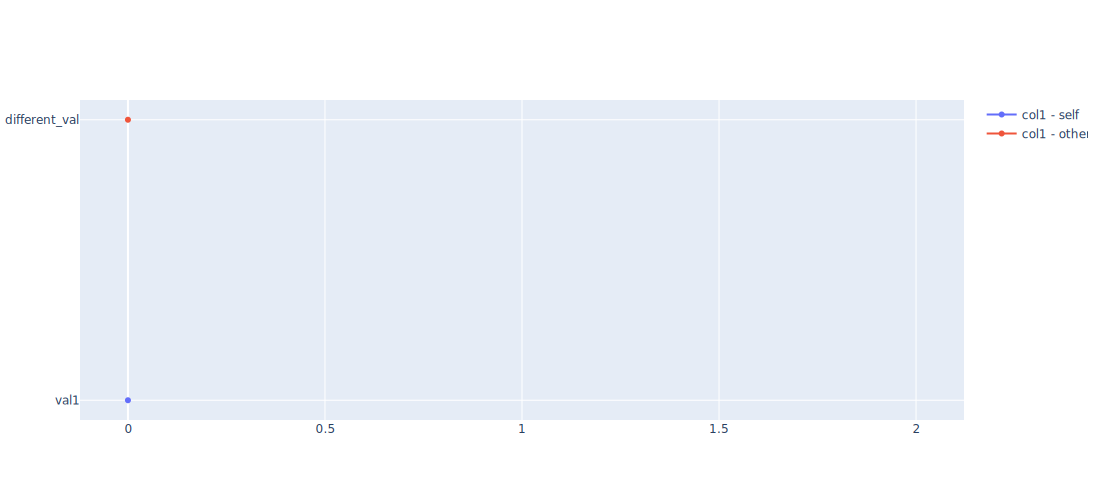

In [13]:
col = 'col1'

df = compare

fig = go.Figure(data=[
    
    go.Scatter(x=df.index, y=df[col]['self'], name=f"{col} - self"),
    go.Scatter(x=df.index, y=df[col]['other'], name=f"{col} - other"),

])

fig.update_layout(
    width=1100,
)

fig.show(renderer="svg")